In [1]:
import pandas as pd
from fractions import Fraction
from empiricaldist import Pmf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [6]:
def odds(p):
    return p / (1-p)

def prob(o):
    return o / (o+1)

def prob2(yes, no):
    return yes / (yes + no)

In [7]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

## Oliver’s Blood

In [10]:
# P(Ol) = 0.9

# odds(Ol|0)
# P(AB) = 0.01
# P(0) = 0.6

p_Ol_data = 1 / (1.2+1)
p_Ol_data

0.45454545454545453

In [12]:
prob(odds(0.9)*(1/1.2))

0.8823529411764706

## Addends

In [13]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

die = make_die(6)

die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [14]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

In [15]:
twice = die.add_dist(die)
twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


## Gluten

In [16]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [25]:
def make_binomial(n, p):
    dist = Pmf(1, np.arange(0, n+1))
    dist *= binom.pmf(dist.qs, n, p)
    dist.normalize()
    return dist

In [27]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

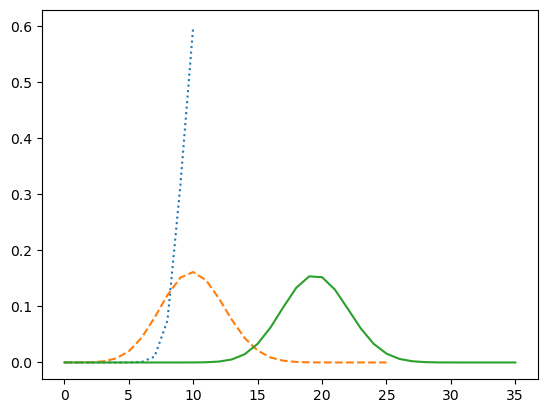

In [31]:
dist_total = dist_sensitive.add_dist(dist_insensitive)
dist_sensitive.plot(label='sensitive', ls=':')
dist_insensitive.plot(label='insensitive', ls='--')
dist_total.plot(label='total');

In [32]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [33]:
table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

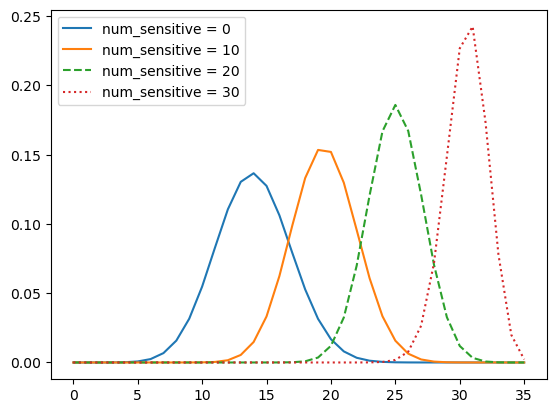

In [35]:
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')

plt.legend();

In [37]:
likelihood1 = table.loc[12]

hypos = np.arange(n+1)
prior = Pmf(1, hypos)

posterior1 = prior * likelihood1
posterior1.normalize()

posterior1.head(5)

,probs
0,0.232527
1,0.202077
2,0.167522
3,0.131873
4,0.098064


In [38]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887373

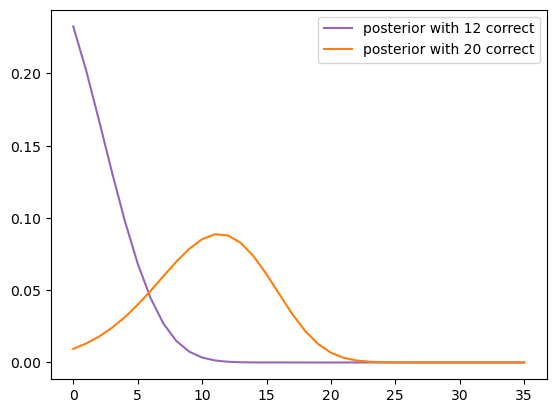

In [39]:
posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

plt.legend();

## Elvis

In [44]:
# P(id|bb)
# P(fr) = 2/3
# P(id) = 1/3

prob(odds(1/3) * ((1/2) / (1/4)))

0.49999999999999994

In [45]:
((1/2) / (1/4))

2.0

## Seattle

In [47]:
# P(L) = 1/3
# P(T) = 2/3
# P(R) = 0.1
# P(R|YYY)

o_prior = odds(0.1)
like_ratio = ((2/3)**3) / ((1/3)**3)
prob(o_prior * like_ratio)

0.4705882352941177

## CDC

In [48]:
# Odd(C|Sm) = 25 * Odd(C|NSm)
# P(Sm) = 0.14
# P(Sm|C)

prob(odds(0.14)*25)


0.8027522935779816

## D&D

In [60]:
d6 = make_die(6)
hp_before = Pmf.add_dist(d6, d6)

hp_after = Pmf.sub_dist(hp_before, 3)
hp_after

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [61]:
hp_after[[-1, 0]] = 0
hp_after.normalize()
hp_after

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [64]:
points_left = Pmf.sub_dist(hp_after, d6)
points_left.prob_le(0)

0.4545454545454545

## Dices

In [66]:
d6 = make_die(6).mul_dist(make_die(6))
d8 = make_die(8).mul_dist(make_die(8))
d12 = make_die(12).mul_dist(make_die(12))

## US

In [95]:
n = 538

ns = range(0, n+1)
table = pd.DataFrame(index=ns, columns=ns, dtype=float)

In [96]:
for n_honest in ns:
    n_dishonest = n - n_honest

    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)    
    table[n_honest] = dist_total
    
table.shape

(539, 539)

In [97]:
data = 312
likelihood = table.loc[312]
len(likelihood)

539

In [98]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)
len(prior)

539

In [99]:
posterior = prior * likelihood
posterior.normalize()
posterior.mean()

431.4882114501995

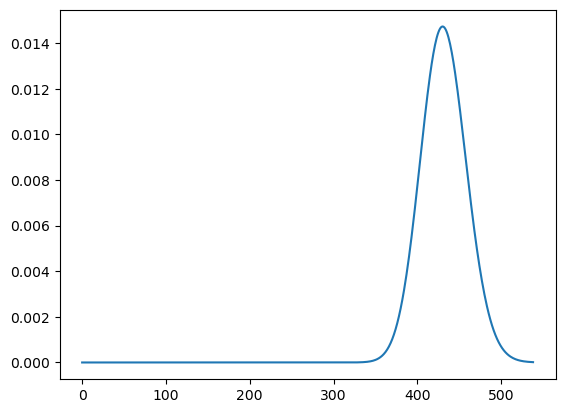

In [100]:
posterior.plot(label='posterior');

In [101]:
posterior.credible_interval(0.9)

array([388., 477.])